In [647]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [648]:
df = pd.read_csv("Arts.csv")
del df['Sr.No']

In [649]:
df.head()

,url,Painting name,Artist Name,Height,Width,Location,Artist_Region,Views,Favorites,Painting_PopularityIndex,...,Age of painting as on 8-Apr,Artist_artworks,Artist_followers,Artist_popularityIndex,Material,Number_materials,Pri12y_materials,Style,Number_styles,Pri12y_style
0,https://www.saatchiart.com/art/Painting-Cafe-J...,Cafe Jardin Painting by Shellie Garber,Shellie Garber,24.0,18.0,United States,North America,61,5,0.082,...,0,136,94,0.04,Paper,1,Paper,"Abstract, Abstract Expressionism, Fine Art",3,Abstract
1,https://www.saatchiart.com/art/Painting-Rose-T...,Rose Trellis Painting by Shellie Garber,Shellie Garber,14.0,11.0,United States,North America,117,9,0.077,...,13,136,94,0.04,Paper,1,Paper,"Abstract, Abstract Expressionism, Fine Art",3,Abstract
2,https://www.saatchiart.com/art/Painting-Deck-C...,Deck Chairs Series No7 Painting by Renata Fern...,Renata Fernandez,15.7,12.6,United Kingdom,Europe,89,13,0.146,...,48,52,173,0.07,"Canvas, Cardboard",2,Canvas,"Figurative, Fine Art, Realism",3,Figurative
3,https://www.saatchiart.com/art/Painting-At-the...,At the Beach,Dan Adams,8.0,10.0,United States,North America,0,0,0.000,...,84,91,224,0.09,Canvas,1,Canvas,"Expressionism, Figurative, Fine Art",3,Expressionism
4,https://www.saatchiart.com/art/Painting-not-hu...,not human... rave,yossi kotler,47.2,31.5,Israel,Asia,0,0,0.000,...,98,432,417,0.17,Canvas,1,Canvas,"Abstract Expressionism, Conceptual, Figurative...",5,Abstract Expressionism


In [650]:
df.corr()

,Height,Width,Views,Favorites,Painting_PopularityIndex,Price,Number of mediums,Size,Month,Day,Year,Date uploaded,Age of painting as on 8-Apr,Artist_artworks,Artist_followers,Artist_popularityIndex,Number_materials,Number_styles
Height,1.000000,0.773579,0.064189,0.099683,-0.018733,0.406651,0.040014,0.904715,0.015464,0.022029,-0.041519,-0.039862,0.039861,-0.097781,-0.032804,-0.033621,0.001382,0.054370
Width,0.773579,1.000000,0.058348,0.087687,-0.024627,0.459561,0.036727,0.895826,0.025506,0.011801,-0.054126,-0.052136,0.052135,-0.096922,-0.048732,-0.049374,0.041112,0.005247
Views,0.064189,0.058348,1.000000,0.704856,-0.236100,0.102892,-0.039679,0.048608,-0.095322,-0.118775,-0.120957,-0.132663,0.132662,0.092752,0.382970,0.382691,-0.029340,0.013623
Favorites,0.099683,0.087687,0.704856,1.000000,0.066176,0.118023,-0.001480,0.096490,-0.062589,-0.089418,-0.022094,-0.030013,0.030013,0.019972,0.273371,0.273608,-0.013125,0.040153
Painting_PopularityIndex,-0.018733,-0.024627,-0.236100,0.066176,1.000000,-0.024123,0.036801,-0.000698,0.164723,0.146284,0.106630,0.121582,-0.121581,-0.123293,-0.157220,-0.156442,0.058569,0.053977
Price,0.406651,0.459561,0.102892,0.118023,-0.024123,1.000000,-0.027806,0.453142,0.002176,-0.000289,-0.090801,-0.090356,0.090356,-0.045076,0.000802,0.000575,0.001109,0.028723
Number of mediums,0.040014,0.036727,-0.039679,-0.001480,0.036801,-0.027806,1.000000,0.028380,0.039249,0.042733,0.035288,0.038304,-0.038305,0.003690,-0.000007,0.000389,0.121849,0.092608
Size,0.904715,0.895826,0.048608,0.096490,-0.000698,0.453142,0.028380,1.000000,0.015637,0.011546,-0.045424,-0.043735,0.043734,-0.090355,-0.042867,-0.043473,0.018255,0.016790
Month,0.015464,0.025506,-0.095322,-0.062589,0.164723,0.002176,0.039249,0.015637,1.000000,0.612989,-0.028270,0.048764,-0.048767,0.029873,0.057687,0.057951,0.006876,0.120311
Day,0.022029,0.011801,-0.118775,-0.089418,0.146284,-0.000289,0.042733,0.011546,0.612989,1.000000,-0.013479,0.050203,-0.050205,0.012962,0.072607,0.072969,0.041831,0.134207


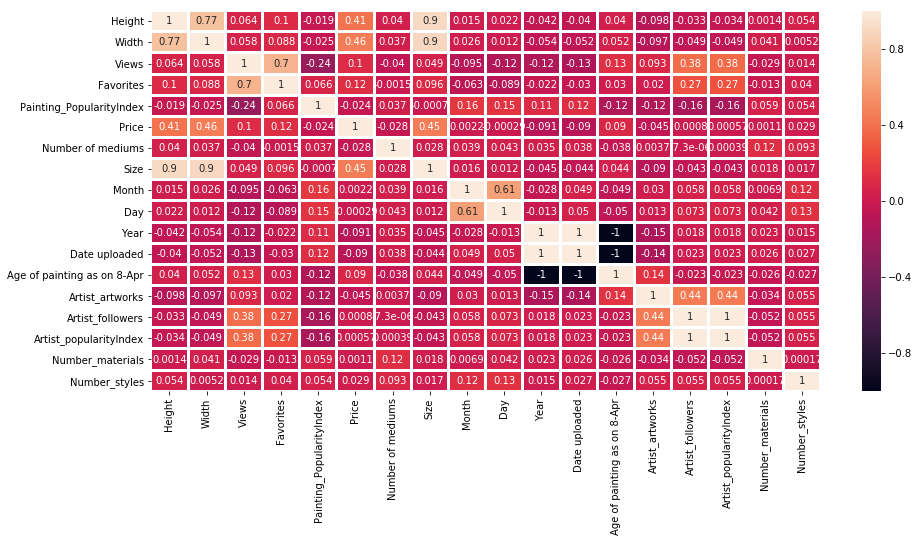

In [815]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=2)

In [813]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 31 columns):
url                            1232 non-null object
Painting name                  1232 non-null object
Artist Name                    1232 non-null object
Height                         1232 non-null float64
Width                          1232 non-null float64
Location                       1232 non-null object
Artist_Region                  1232 non-null object
Views                          1232 non-null int64
Favorites                      1232 non-null int64
Painting_PopularityIndex       1232 non-null float64
Price                          1232 non-null int64
Subject                        1232 non-null object
Medium                         1232 non-null object
Number of mediums              1232 non-null int64
Pri12y medium                  1232 non-null object
Published date                 1232 non-null object
Size                           1232 non-null float64
Month    

In [814]:
df.describe()

,Height,Width,Views,Favorites,Painting_PopularityIndex,Price,Number of mediums,Size,Month,Day,Year,Date uploaded,Age of painting as on 8-Apr,Artist_artworks,Artist_followers,Artist_popularityIndex,Number_materials,Number_styles
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000
mean,30.578003,30.693750,686.096591,18.426948,0.038084,2668.861201,1.612013,1165.598336,10.284903,25.895292,2013.668019,41814.708604,1018.293019,123.820617,202.211039,0.082654,1.094156,3.611201
std,16.734353,17.552971,900.332875,20.296011,0.036235,4385.483016,1.025484,1233.487752,3.172408,8.915594,3.419163,1249.755660,1249.754335,207.435025,340.211287,0.139844,0.370608,1.284402
min,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,1.000000,1.000000,1974.000000,27394.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,18.000000,17.450000,131.000000,6.000000,0.016000,740.000000,1.000000,309.290000,10.000000,23.000000,2013.000000,41639.000000,464.000000,22.000000,13.000000,0.010000,1.000000,3.000000
50%,28.000000,27.800000,408.000000,13.000000,0.029000,1635.000000,1.000000,768.300000,12.000000,31.000000,2015.000000,42117.000000,716.000000,57.000000,57.000000,0.020000,1.000000,4.000000
75%,39.400000,39.400000,887.000000,24.000000,0.049000,3210.000000,2.000000,1552.360000,12.000000,31.000000,2015.000000,42369.000000,1194.000000,125.250000,233.000000,0.100000,1.000000,5.000000
max,200.000000,130.000000,9196.000000,242.000000,0.308000,106000.000000,5.000000,14000.000000,12.000000,31.000000,2017.000000,42835.000000,15439.000000,1974.000000,2435.000000,1.000000,5.000000,5.000000


In [738]:
X = df[[
       'Views', 'Favorites', 'Painting_PopularityIndex', 'Number of mediums', 'Size', 'Month', 'Day', 'Year',
       'Age of painting as on 8-Apr', 'Artist_artworks', 'Artist_followers',
       'Artist_popularityIndex', 'Number_materials',
       'Number_styles']]

X.head()

,Views,Favorites,Painting_PopularityIndex,Number of mediums,Size,Month,Day,Year,Age of painting as on 8-Apr,Artist_artworks,Artist_followers,Artist_popularityIndex,Number_materials,Number_styles
0,61,5,0.082,1,432.00,4,10,2017,0,136,94,0.04,1,3
1,117,9,0.077,1,154.00,12,26,2017,13,136,94,0.04,1,3
2,89,13,0.146,1,197.82,2,19,2017,48,52,173,0.07,2,3
3,0,0,0.000,1,80.00,1,14,2017,84,91,224,0.09,1,3
4,0,0,0.000,4,1486.80,12,31,2016,98,432,417,0.17,1,5


In [739]:
y = df['Price']

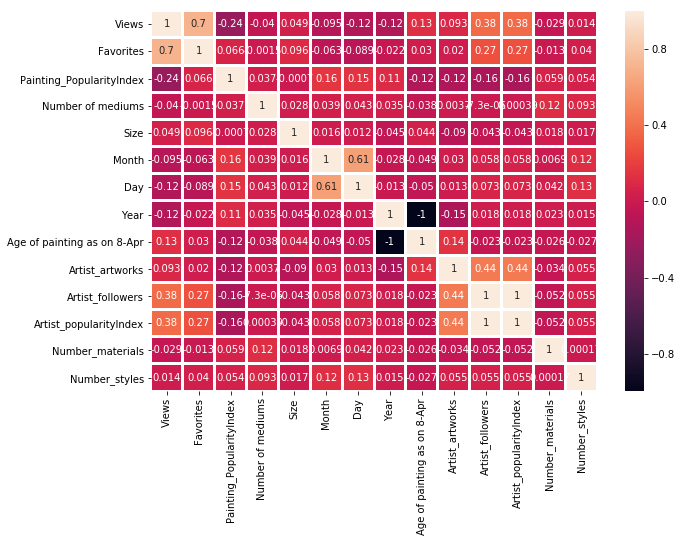

In [740]:
plt.figure(figsize=(10,7))
sns.heatmap(X.corr(),annot=True,linewidths=2)

In [741]:
from sklearn.cross_validation import train_test_split

In [928]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=750)

In [929]:
X_train

,Views,Favorites,Painting_PopularityIndex,Number of mediums,Size,Month,Day,Year,Age of painting as on 8-Apr,Artist_artworks,Artist_followers,Artist_popularityIndex,Number_materials,Number_styles
784,1541,20,0.013,1,90.00,12,31,2014,829,58,365,0.15,1,2
836,596,7,0.012,2,100.00,12,26,2014,834,107,25,0.01,2,2
1060,1841,46,0.025,1,1859.68,12,31,2012,1559,32,336,0.14,1,3
850,1378,29,0.021,1,2328.54,11,19,2014,871,32,17,0.01,1,2
485,1845,59,0.032,3,424.80,12,31,2015,464,62,254,0.10,1,3
700,0,0,0.000,3,2304.00,12,31,2014,829,24,18,0.01,1,5
290,304,13,0.043,1,1859.68,12,31,2015,464,125,299,0.12,1,4
931,0,0,0.000,1,309.29,12,31,2013,1194,128,80,0.03,1,4
1058,750,18,0.024,1,2727.90,12,31,2012,1559,13,9,0.00,1,3
108,86,7,0.081,1,216.00,12,31,2016,98,33,106,0.04,1,4


In [930]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (739, 14)
Test feature set size: (493, 14)
Training variable set size: (739,)
Test variable set size: (493,)


In [931]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [932]:
lm = LinearRegression() # Creating a Linear Regression object 'lm'
#logModel = LogisticRegression(fit_intercept=True, n_jobs=1)

In [933]:
lm.fit(X_train,y_train) # Fit the linear model on to the 'lm' object itself i.e. no need to set this to another variable
#logModel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [934]:
#predictions = logModel.predict(X_test)
#predictions[:5]

In [935]:
y_test

67       1050
609       405
389      3474
14        815
131      1000
672       630
733      2040
456      3210
157      1990
773      1990
1050     8700
973      4110
575       345
921       980
43       1190
864       290
1147     3510
714      2900
861     34000
1044     1240
121      1250
334       215
858      1500
155      5410
364      3910
742      1050
380      1315
583       490
721       445
605      1640
        ...  
154       930
802      5210
927      1340
1027     3360
152      8700
770      3050
901      1990
940       980
1063     1490
297      2033
179       560
781      1990
974       560
558      6600
323       560
985      2750
84        690
436       410
1111     2440
49       3150
919      8700
457      2150
666      3250
976       640
59        850
710      2750
663       760
508      2165
911       350
1008      290
Name: Price, Length: 493, dtype: int64

In [936]:
print("The intercept term of the linear model:", lm.intercept_)

The intercept term of the linear model: -1165522.30335


In [937]:
print("The coefficients of the linear model:", lm.coef_)

The coefficients of the linear model: [  2.88694239e-01  -1.78520046e-03  -3.87272368e+03  -1.95547859e+02
   1.42673146e+00   1.62070180e+01   1.63353406e+01   5.77943267e+02
   1.85270841e+00  -3.99429884e-01   4.79047850e+00  -1.07692146e+04
   1.93667083e+02   5.91326712e+01]


In [938]:
lm.coef_

array([  2.88694239e-01,  -1.78520046e-03,  -3.87272368e+03,
        -1.95547859e+02,   1.42673146e+00,   1.62070180e+01,
         1.63353406e+01,   5.77943267e+02,   1.85270841e+00,
        -3.99429884e-01,   4.79047850e+00,  -1.07692146e+04,
         1.93667083e+02,   5.91326712e+01])

In [939]:
#idict = {'Coefficients':lm.intercept_}
#idf = pd.DataFrame(data=idict,index=['Intercept'])
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
#cdf=pd.concat([cdf,idf], axis=0)
cdf

,Coefficients
Views,0.288694
Favorites,-0.001785
Painting_PopularityIndex,-3872.723683
Number of mediums,-195.547859
Size,1.426731
Month,16.207018
Day,16.335341
Year,577.943267
Age of painting as on 8-Apr,1.852708
Artist_artworks,-0.399430


In [940]:
n=X_train.shape[0]
k=X_train.shape[1]
dfN = n-k
train_pred=lm.predict(X_train)
train_error = np.square(train_pred - y_train)
sum_error=np.sum(train_error)
se=np.zeros(X.columns.size)
for i in range(k):
    r = (sum_error/dfN)
    r = r/np.sum(np.square(X_train[list(X_train.columns)[i]]-X_train[list(X_train.columns)[i]].mean()))
    se[i]=np.sqrt(r)
cdf['Standard Error']=se
cdf['t-statistic']=cdf['Coefficients']/cdf['Standard Error']
cdf

,Coefficients,Standard Error,t-statistic
Views,0.288694,0.091119,3.168311
Favorites,-0.001785,4.163034,-0.000429
Painting_PopularityIndex,-3872.723683,2422.729297,-1.598496
Number of mediums,-195.547859,89.054259,-2.195828
Size,1.426731,0.067797,21.044300
Month,16.207018,29.536517,0.548711
Day,16.335341,10.438843,1.564861
Year,577.943267,24.921086,23.190934
Age of painting as on 8-Apr,1.852708,0.068385,27.092358
Artist_artworks,-0.399430,0.425696,-0.938299


In [941]:
print("Therefore, features arranged in the order of importance for predicting the price\n",'-'*90,sep='')
l=list(cdf.sort_values('t-statistic',ascending=False).index)
print(' > \n'.join(l))

Therefore, features arranged in the order of importance for predicting the price
------------------------------------------------------------------------------------------
Age of painting as on 8-Apr > 
Year > 
Size > 
Artist_followers > 
Views > 
Day > 
Number_styles > 
Number_materials > 
Month > 
Favorites > 
Artist_artworks > 
Painting_PopularityIndex > 
Number of mediums > 
Artist_popularityIndex


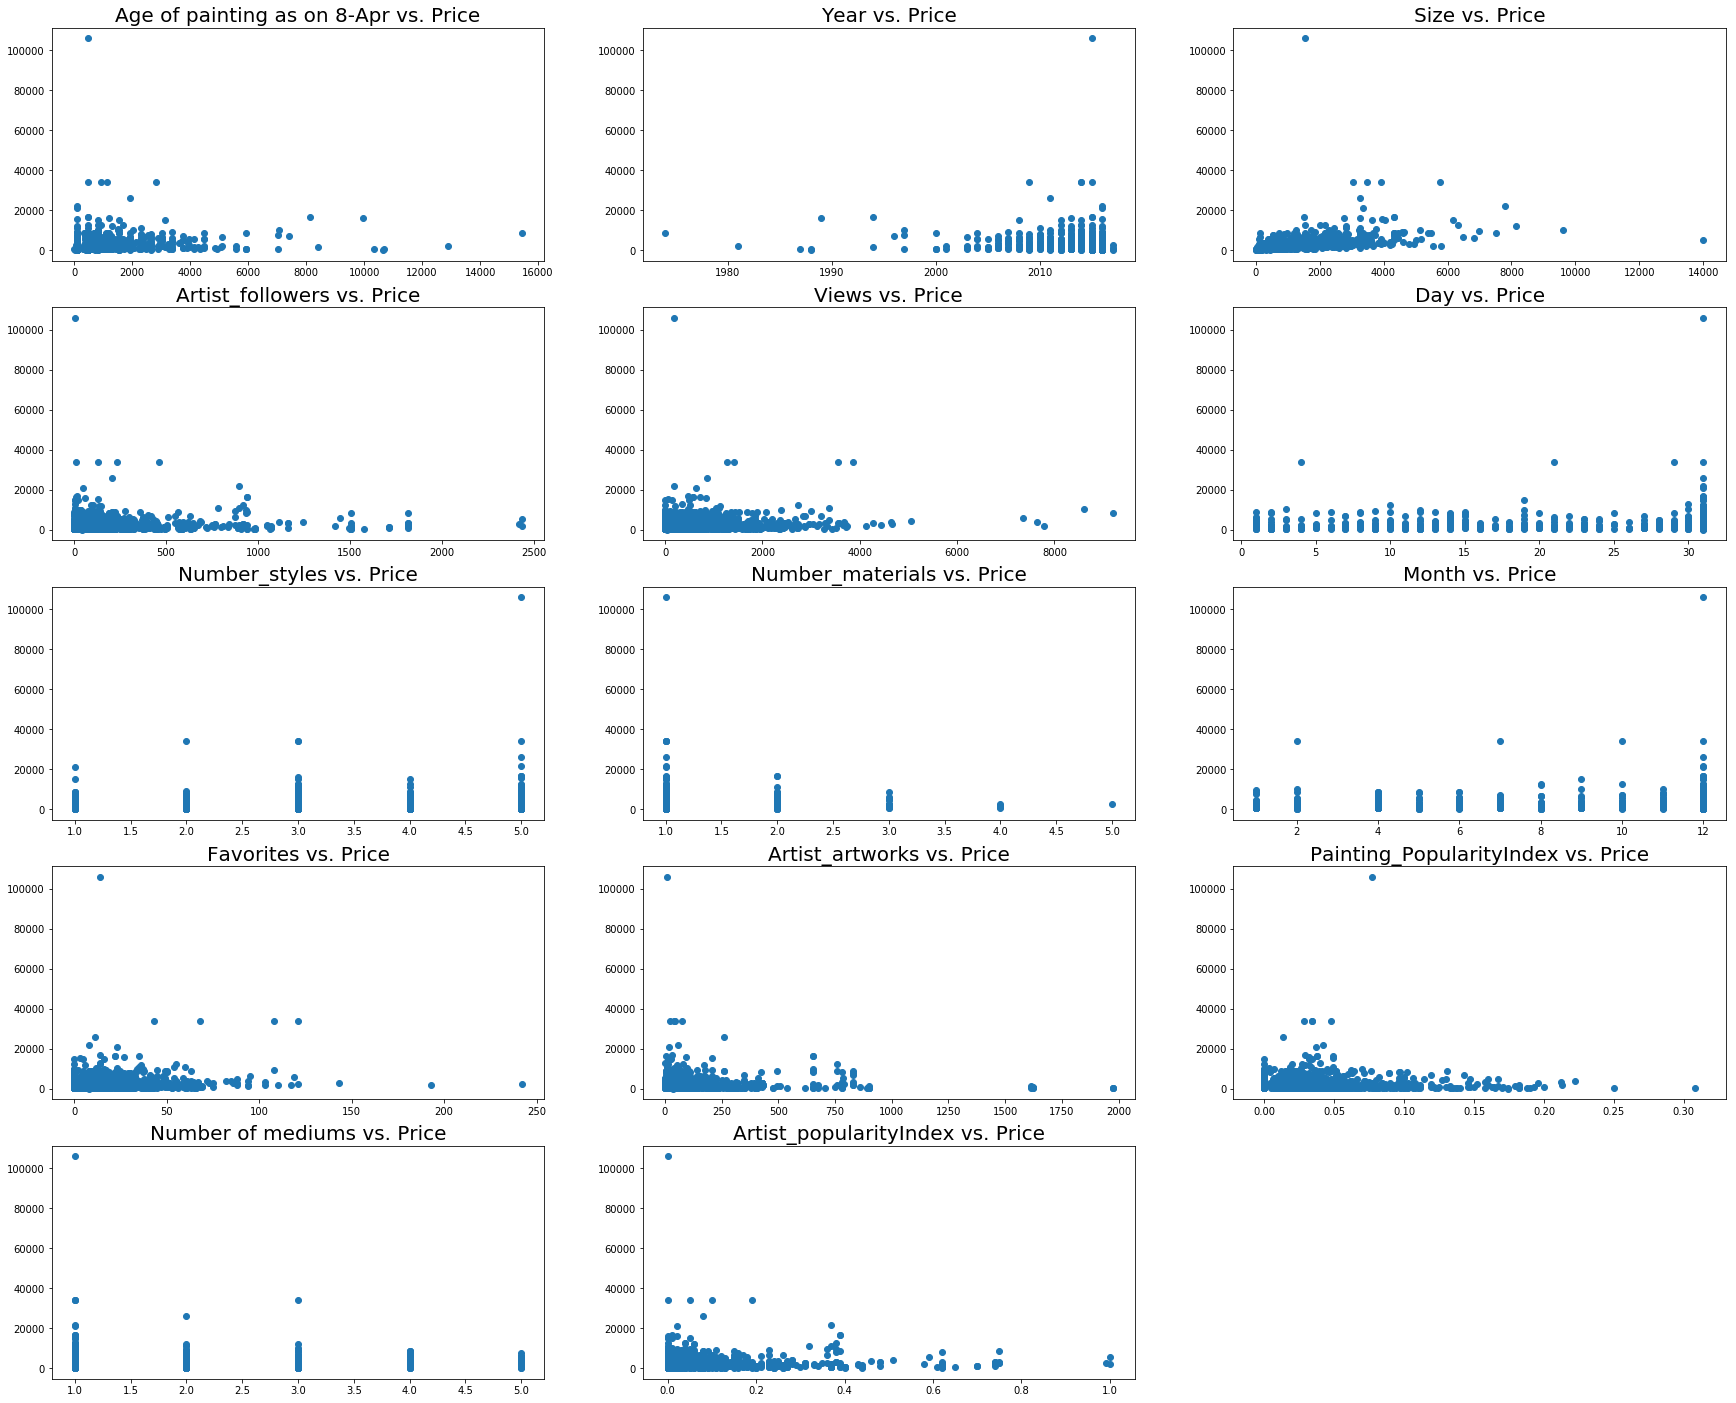

In [942]:
from matplotlib import gridspec
fig = plt.figure(figsize=(30, 30))
gs = gridspec.GridSpec(6,3)
#f, ax = plt.subplots(nrows=1,ncols=len(l), sharey=True)
index = 0
for value in l:
    if(value!="Intercept"):
        ax = plt.subplot(gs[index])
        ax.scatter(df[value],df['Price'])
        ax.set_title(value+" vs. Price", fontdict={'fontsize':20})
        index=index+1

In [943]:
print("R-squared value of this fit:", round(metrics.r2_score(y_train,train_pred),3))

R-squared value of this fit: 0.412


In [944]:
predictions = logModel.predict(X_test)
print ("Type of the predicted object:", type(predictions))
print ("Size of the predicted object:", predictions.shape)

Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (493,)


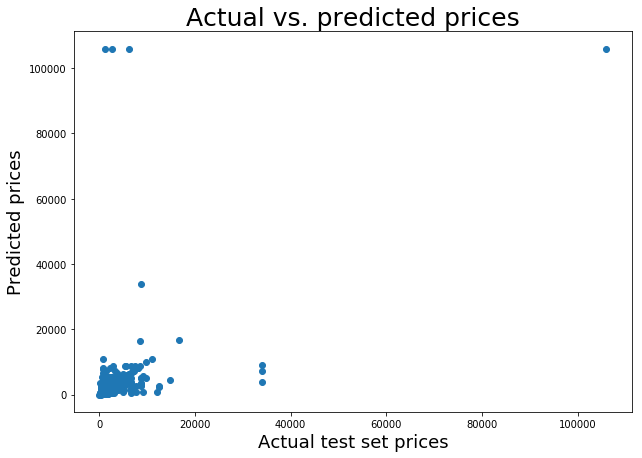

In [945]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted prices",fontsize=25)
plt.xlabel("Actual test set prices",fontsize=18)
plt.ylabel("Predicted prices", fontsize=18)
plt.scatter(x=y_test,y=predictions)

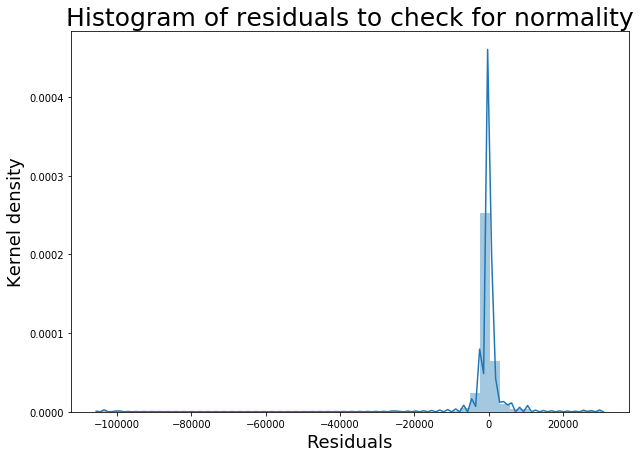

In [946]:
plt.figure(figsize=(10,7))
plt.title("Histogram of residuals to check for normality",fontsize=25)
plt.xlabel("Residuals",fontsize=18)
plt.ylabel("Kernel density", fontsize=18)
sns.distplot([y_test-predictions])

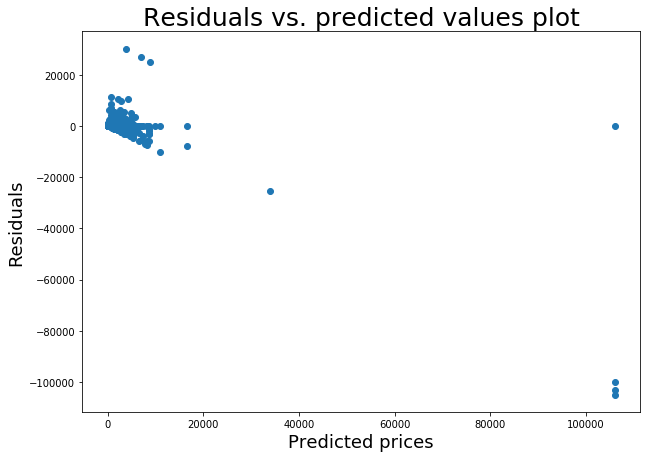

In [947]:
plt.figure(figsize=(10,7))
plt.title("Residuals vs. predicted values plot",fontsize=25)
plt.xlabel("Predicted prices",fontsize=18)
plt.ylabel("Residuals", fontsize=18)
plt.scatter(x=predictions,y=y_test-predictions)

In [948]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean absolute error (MAE): 1930.59229209
Mean square error (MSE): 74118700.8398
Root mean square error (RMSE): 8609.22184868


In [949]:
#print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))
print("R-squared value of this fit:", round(metrics.r2_score(y_train,train_pred),3))

R-squared value of this fit: 0.412
